# Data Analysis and ML Model on Heart Disease UCI Dataset
**Purpose:** In this notebook, we will be helding important steps for machine learning such as data preprocessing, data analysis, outlier detection and handling and encoding categorical data. At last, we will have created a machine learning model.

**Dataset:** Heart Disease UCI dataset is a dataset collected by Cleveland Clinic Foundation aiming to detect heart health conditions for better insights. The dataset is a popular dataset existing on UCI Machine Learning Repository and includes variety of features used in heart disease detection. It's developed by Robert Detrano and his colleagues in 1988 by aiming to develop a model that can estimate if a person has a heart disease risk or not.

**Note:** We will be using https://archive.ics.uci.edu/dataset/45/heart+disease as our resource.

## Importing the Libraries
Importing the necessary libraries we will be using through this project.

In [164]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
pd.set_option('future.no_silent_downcasting', True)

## First Look at the Data

In [166]:
df = pd.read_csv("/content/drive/MyDrive/heart_disease_uci.csv")

In [167]:
display(df.head())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [168]:
display(df.tail())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [169]:
df.shape

(920, 16)

For a better comprehension, checking the related website: https://archive.ics.uci.edu/dataset/45/heart+disease, we can do a business analysis (detailed inspection).

| Variable Name | Type | Description |
| -------- | ------- | ------- |
| id  | int    | patient id |
| age | int     | age |
| sex    | object    | gender |
| dataset  | object    | source |
| cp  | float | chest pain type |
| trestbps | float    | resting blood pressure |
| chol  | float    | serum cholesteral mg/dl |
| fbs | object     | 	fasting blood sugar > 120 mg/dl |
| restecg    | object    | resting electrocardiographic results (values 0,1,2) |
| exang  | object    | exercise induced angina |
| oldpeak | object     | ST depression induced by exercise relative to rest |
| slope    | object    | the slope of the peak exercise ST segment |
| ca  | float    | number of major vessels colored by fluoroscopy |
| thal | object     | maximum heart rate achieved |
| num    | int    | 0 = normal; 1 = fixed defect; 2 = reversable defect |



## Exploratory Data Analysis (EDA)
In this section, we will be helding steps such as exploring it for a better insight and for more beneficial usage.
* Inspect Data Structure: Have a look at the general structure of the dataset.
* Special Statistics: Inspect mean, standard deviation, min, max and quartile values of numerical columns.
* Missing Value Analysis: Check if there are any missing values and determine how to handle them.
### Inspecting the Data Structure

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


There seems to be some missing values in the dataset. Let's first check the null values.

In [171]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


There are much more null values than it seemed. Now, let's check some statistical values using pandas.DataFrame.describe() method.

### Checking Statistical Values of Numerical Columns

In [172]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


### Missing Value Analysis
Let's find the missing value percentages.

In [173]:
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df))* 100
print(pd.DataFrame({'Missing Values': missing_values,
                    'Percentage': missing_values_percentage}))

          Missing Values  Percentage
id                     0    0.000000
age                    0    0.000000
sex                    0    0.000000
dataset                0    0.000000
cp                     0    0.000000
trestbps              59    6.413043
chol                  30    3.260870
fbs                   90    9.782609
restecg                2    0.217391
thalch                55    5.978261
exang                 55    5.978261
oldpeak               62    6.739130
slope                309   33.586957
ca                   611   66.413043
thal                 486   52.826087
num                    0    0.000000


Now, we can either drop or fill up the missing values. Let's fill them up!

In [174]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(f"Numeric Columns: {numeric_columns}")

Numeric Columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')


In [175]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {categorical_columns}")

Categorical Columns: Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [176]:
from sklearn.impute import SimpleImputer

# Filling up the numerical values
for col in numeric_columns:
  df[col] = df[col].fillna(df[col].mean())

In [177]:
# Filling up the categorical values
for col in categorical_columns:
  df[col] = df[col].fillna(df[col].mode()[0])

In [178]:
# Checking the missing values
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


* _Checking the unique values for encoding process._

In [179]:
for col in categorical_columns:
    print(f"{col} column's unique values: {df[col].unique()}\n")

sex column's unique values: ['Male' 'Female']

dataset column's unique values: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']

cp column's unique values: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']

fbs column's unique values: [True False]

restecg column's unique values: ['lv hypertrophy' 'normal' 'st-t abnormality']

exang column's unique values: [False True]

slope column's unique values: ['downsloping' 'flat' 'upsloping']

thal column's unique values: ['fixed defect' 'normal' 'reversable defect']



In [180]:
for col in numeric_columns:
    print(f"{col} column's unique values: {df[col].nunique()}\n")

id column's unique values: 920

age column's unique values: 50

trestbps column's unique values: 62

chol column's unique values: 218

thalch column's unique values: 120

oldpeak column's unique values: 54

ca column's unique values: 5

num column's unique values: 5



* _Now, for the categorical values, we will be using **label encoder** to 2-unique-value columns and **one hot encoding** to the rest._

In [181]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:
    if df[col].nunique() == 2:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else:
        # Create dummy variables and concatenate with the original DataFrame
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True) #drop_first=True to drop the redundant column
        df = pd.concat([df, dummies], axis=1)
        df.drop(col, axis=1, inplace=True) # Remove original column

In [189]:
# Checking for encoded data once more
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col} column's unique values: {df[col].unique()}\n")

No output, so all done!

In [191]:
print(df.columns)

Index(['id', 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang',
       'oldpeak', 'ca', 'num', 'dataset_Hungary', 'dataset_Switzerland',
       'dataset_VA Long Beach', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality',
       'slope_flat', 'slope_upsloping', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')


## Outlier Analysis
In this section we will be helding:

* Visualization with Box Plots: Drawing a boxplot for each numerical column.
* Outlier Detection: Detect outliers with IQR method.
* Outlier Handling (Standardizing Outliers): Handle outliers by changing them with lower and upper bounds.


--- id Column ---


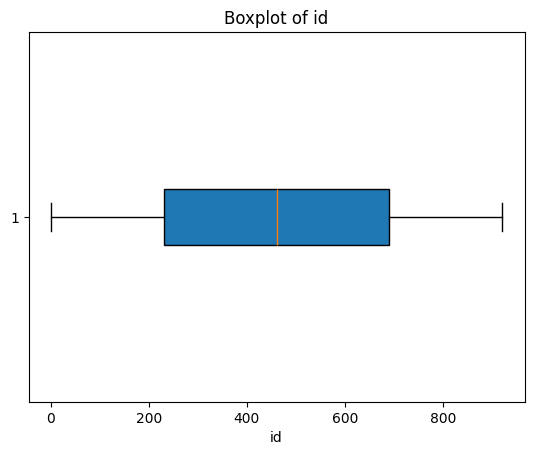

IQR: 459.5, Lower Bound: -458.5, Upper Bound: 1379.5
Outlier amount: 0
Outlier amount with z-score: 0


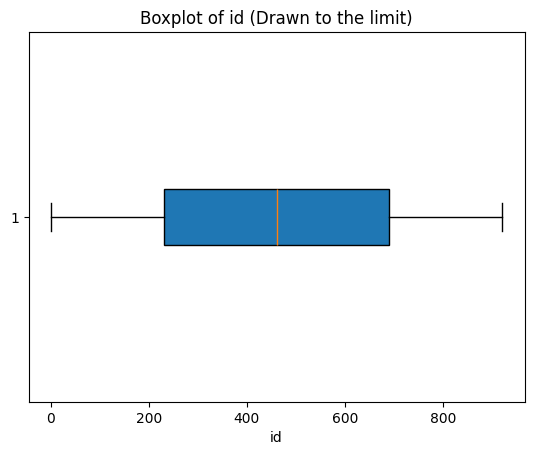


--- age Column ---


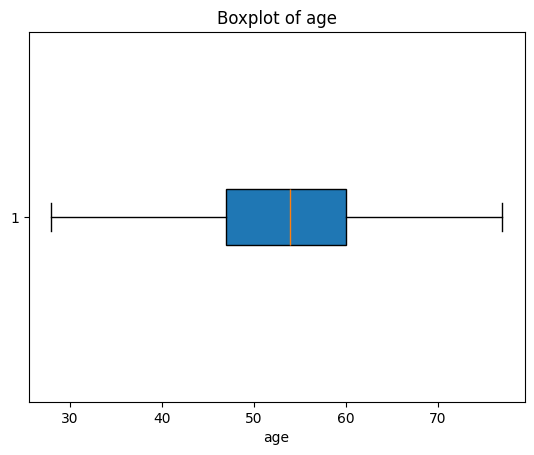

IQR: 13.0, Lower Bound: 27.5, Upper Bound: 79.5
Outlier amount: 0
Outlier amount with z-score: 0


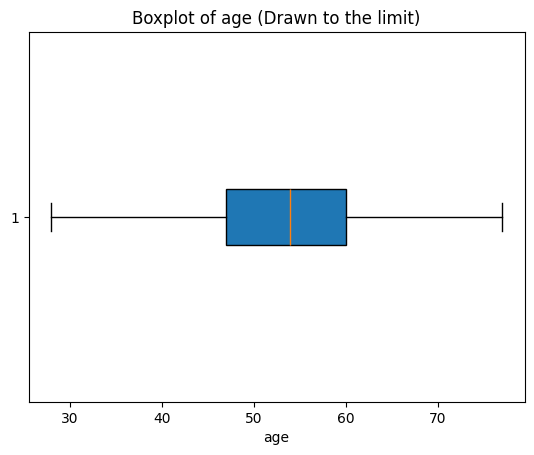


--- trestbps Column ---


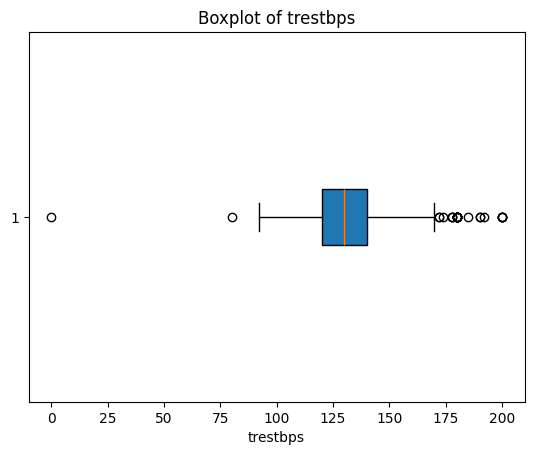

IQR: 20.0, Lower Bound: 90.0, Upper Bound: 170.0
Outlier amount: 28
Outlier amount with z-score: 8


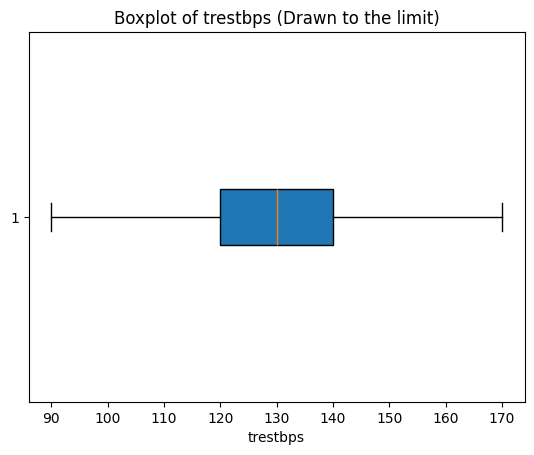


--- chol Column ---


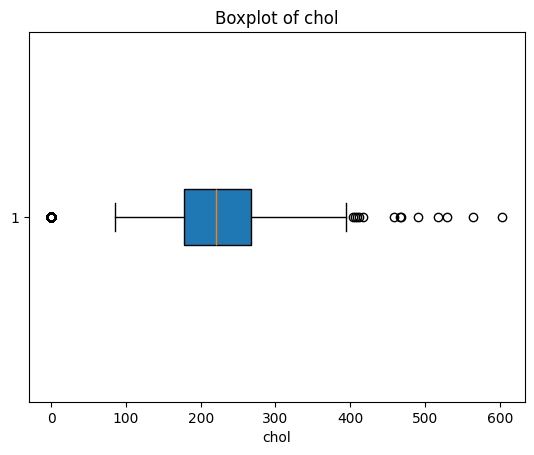

IQR: 89.25, Lower Bound: 43.875, Upper Bound: 400.875
Outlier amount: 185
Outlier amount with z-score: 3


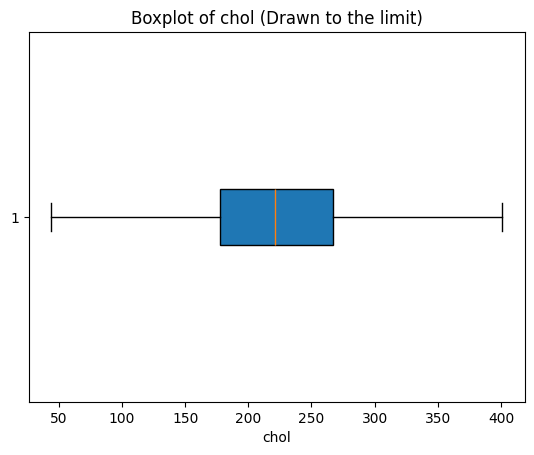


--- thalch Column ---


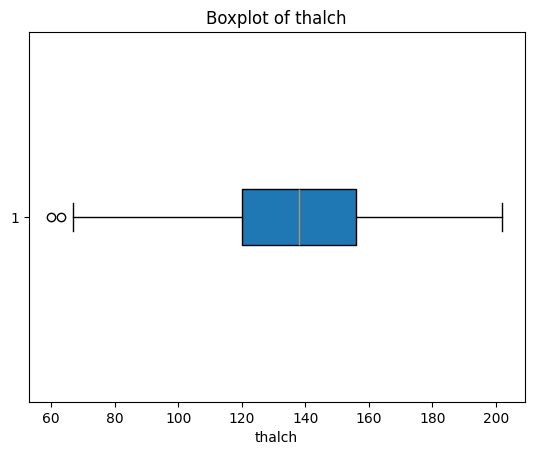

IQR: 36.0, Lower Bound: 66.0, Upper Bound: 210.0
Outlier amount: 2
Outlier amount with z-score: 1


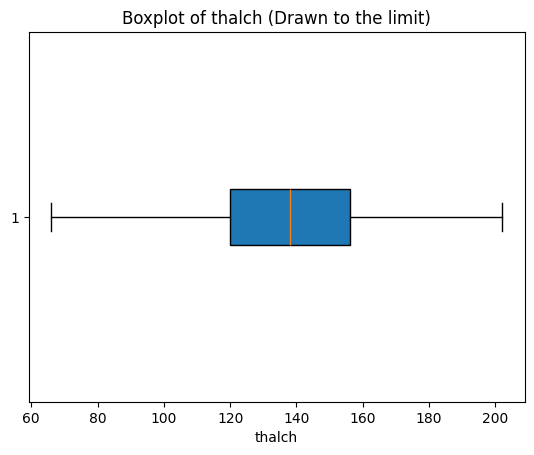


--- oldpeak Column ---


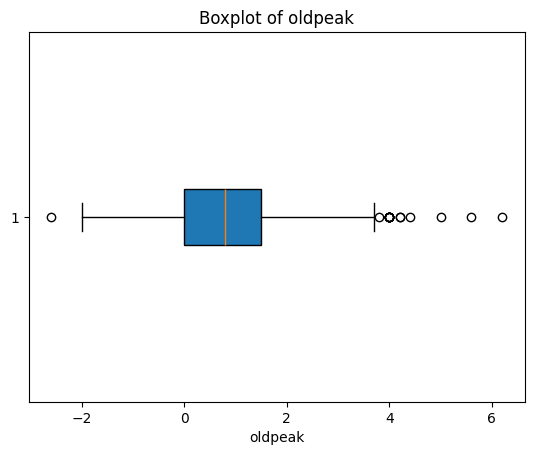

IQR: 1.5, Lower Bound: -2.25, Upper Bound: 3.75
Outlier amount: 16
Outlier amount with z-score: 7


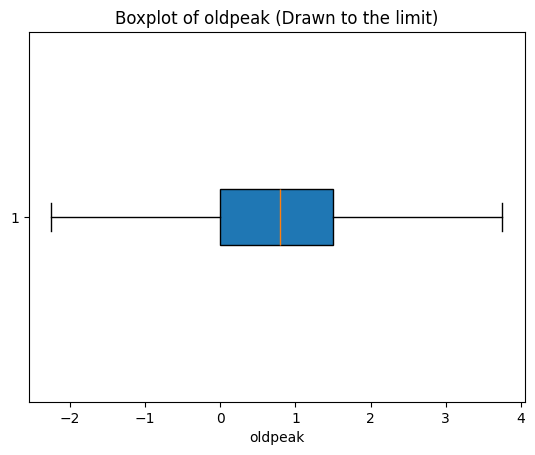


--- ca Column ---


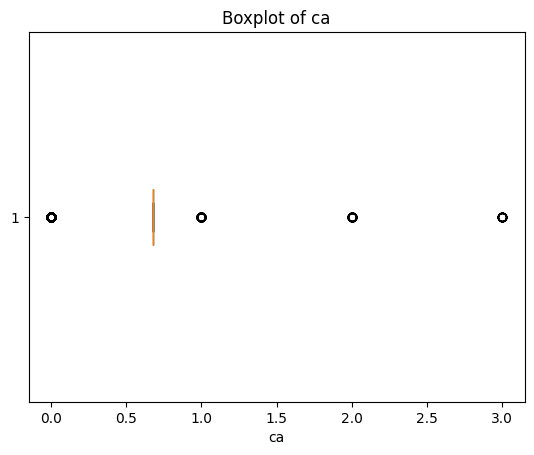

IQR: 0.0, Lower Bound: 0.6763754045307443, Upper Bound: 0.6763754045307443
Outlier amount: 309
Outlier amount with z-score: 20


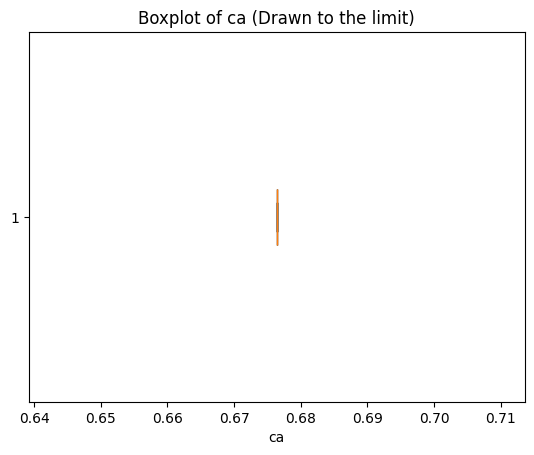


--- num Column ---


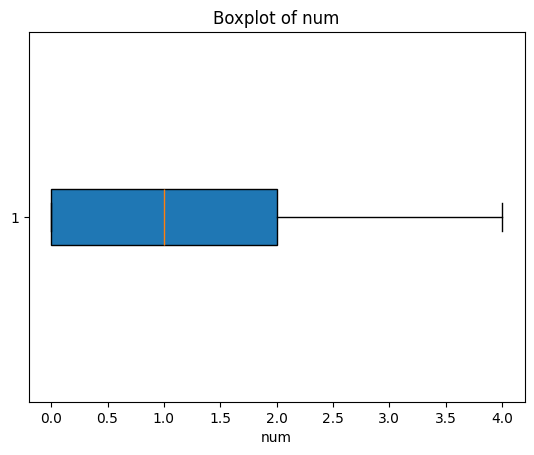

IQR: 2.0, Lower Bound: -3.0, Upper Bound: 5.0
Outlier amount: 0
Outlier amount with z-score: 0


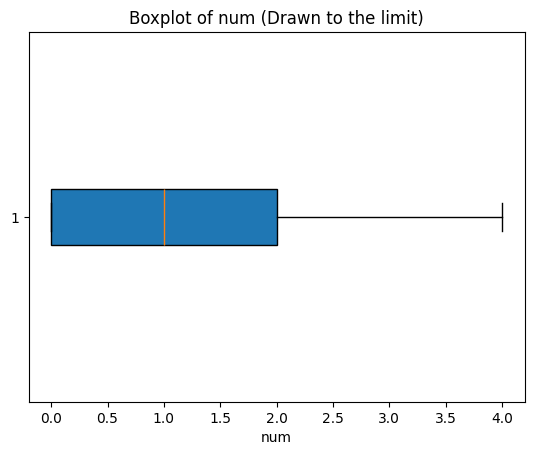

In [182]:
for col in numeric_columns:
    print(f"\n--- {col} Column ---")

    # Visualize outliers with boxplot
    plt.boxplot(df[col], vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

    # Outlier analysis with IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outlier amount: {len(outliers)}")

    # Outlier analysis with Z-score
    z_scores = zscore(df[col])
    outliers_z = df[np.abs(z_scores) > 3]
    print(f"Outlier amount with z-score: {len(outliers_z)}")

    # Draw the outliers to the limit
    df[col] = df[col].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

    # Visualize the limit drawn data again
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col} (Drawn to the limit)")
    plt.xlabel(col)
    plt.show()

## Splitting Train, Validation and Test Datasets


In [183]:
# Splitting Train and Test Sets
X = df.drop('num', axis=1)
y = df['num']
X_train, X_holdout_set, y_train, y_holdout_set = train_test_split(X, y, test_size=0.4, random_state=42)

In [184]:
display({"X_train": X_train.shape,
         "y_train": y_train.shape,
         "X_holdout_test": X_holdout_set.shape,
         "y_holdout_test": y_holdout_set.shape})

{'X_train': (552, 22),
 'y_train': (552,),
 'X_holdout_test': (368, 22),
 'y_holdout_test': (368,)}

In [185]:
# Splitting Validation and Test Sets
X_val_train, X_val_test, y_hold_train, y_hold_test = train_test_split(X_holdout_set, y_holdout_set, test_size=0.5, random_state=42)

In [186]:
display({"X_val_train": X_val_train.shape,
         "y_val_train": X_val_test.shape,
         "y_hold_train": y_hold_test.shape,
         "y_hold_test": y_hold_test.shape})

{'X_val_train': (184, 22),
 'y_val_train': (184, 22),
 'y_hold_train': (184,),
 'y_hold_test': (184,)}

###   _**Now, our model is ready to be trained!**_